In [5]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_pickle('childrens_book_df.pkl')

In [7]:
df.head()

,Title,Author,Chapter,NLP_Text,Readable_Text
0,Prince Prigio,Andrew Lang,I,lcb chapter heading picture p1jpg rcb fairies ...,How the Fairies were not Invited to Court. Onc...
1,Prince Prigio,Andrew Lang,II,lcb chapter heading picture p9jpg rcb prince p...,"Prince Prigio and his Family. Well, the little..."
2,Prince Prigio,Andrew Lang,III,firedrake people like prigio dear papa king gr...,About the Firedrake. Of all the people who did...
3,Prince Prigio,Andrew Lang,IV,prince prigio deserted everybody meanwhile pri...,How Prince Prigio was Deserted by Everybody. M...
4,Prince Prigio,Andrew Lang,V,prince prigio found garret prince walked room ...,What Prince Prigio found in the Garret. The pr...


In [8]:
#find top 20 words in corpus
common = Counter(" ".join(df["NLP_Text"]).split()).most_common(100)
common[:20]

[('said', 26435),
 ('nt', 25146),
 ('would', 16386),
 ('little', 16369),
 ('could', 13458),
 ('old', 11453),
 ('like', 10624),
 ('see', 9622),
 ('never', 9202),
 ('time', 8474),
 ('go', 8355),
 ('know', 8060),
 ('came', 8048),
 ('went', 7569),
 ('good', 7544),
 ('well', 7309),
 ('back', 6712),
 ('away', 6681),
 ('much', 6550),
 ('long', 6271)]

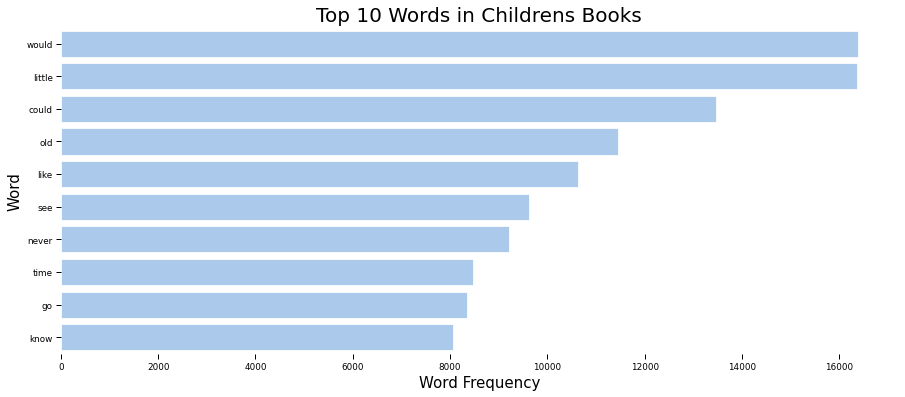

<Figure size 432x288 with 0 Axes>

In [45]:
#plot 
top_words = [item[0] for item in common]
top_word_counts = [item[1] for item in common]

sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(x = top_word_counts[2:12], y = top_words[2:12],
            label = '', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
ax.set_xlabel('Word Frequency',fontsize=15)
ax.set_ylabel('Word',fontsize=15)
ax.set_title('Top 10 Words in Childrens Books', fontsize=20)
sns.despine(left = True, bottom = True)
plt.show()
plt.savefig('top_10.png')

In [10]:
#initialize dict to store relevant letter combinations for sounds
phonics_dict = {
    "diphthongs": ["oo", "ou", "ow", "oi", "oy", "aw", "au", "ie", "igh", "ay", "ee"], 
    "ending blends":["mp", "ng", "nt", "nk", "nd", "sk", "st"], 
    "l blends": ["bl", "cl", "gl", "pl", "sl"], 
    "r blends": ["br", "cr", "dr", "fr", "gr", "pr", "tr"], 
    "s blends": ["sc", "sk", "sl", "sm", "sn", "sp", "st", "str", "scr", "spl"], 
    "digraphs": ["ch", "ph", "sh", "wh", "tch", "th", "gh"], 
    "soft c": ["ce", "ci", "cy"], 
    "soft g": ["ge", "dge", "gi", "gy"], 
    "silent letters": ["kn", "wr", "gn"]
}

In [11]:
#get all dictionary keys into list to loop through
phonics = phonics_dict.values()
phonics_flat = [item for sublist in phonics for item in sublist]

In [14]:
#get frequency of all sounds
count = {}.fromkeys(phonics_flat, 0) #initialize dict

#loop through list of sounds and count all occurences in column, update dict
for sound in phonics_flat:
    sum = df.Readable_Text.str.count(sound).sum()
    count[sound] = sum


In [17]:
#count individual sounds
count_ind = count

In [29]:
count_ind

{'oo': 74109,
 'ou': 216993,
 'ow': 84330,
 'oi': 14560,
 'oy': 10100,
 'aw': 18473,
 'au': 20896,
 'ie': 45862,
 'igh': 31956,
 'ay': 53295,
 'ee': 80344,
 'mp': 15225,
 'ng': 173011,
 'nt': 86916,
 'nk': 17312,
 'nd': 264752,
 'sk': 11605,
 'st': 134058,
 'bl': 27132,
 'cl': 15415,
 'gl': 12184,
 'pl': 29269,
 'sl': 11611,
 'br': 20818,
 'cr': 19676,
 'dr': 18077,
 'fr': 24917,
 'gr': 26382,
 'pr': 29491,
 'tr': 38555,
 'sc': 12265,
 'sm': 7468,
 'sn': 3213,
 'sp': 22698,
 'str': 12186,
 'scr': 2048,
 'spl': 1626,
 'ch': 72320,
 'ph': 3937,
 'sh': 85637,
 'wh': 73083,
 'tch': 8514,
 'th': 528767,
 'gh': 62904,
 'ce': 61289,
 'ci': 12738,
 'cy': 1875,
 'ge': 40644,
 'dge': 2681,
 'gi': 19724,
 'gy': 659,
 'kn': 17955,
 'wr': 4150,
 'gn': 3054}

In [36]:
#get totals by group
count_group = {}.fromkeys(phonics_dict, 0)

for group in phonics_dict:
    for sound in phonics_dict[group]:
        count_group[group] += count_ind[sound]

In [38]:
count_group

{'diphthongs': 650918,
 'ending blends': 702879,
 'l blends': 95611,
 'r blends': 177916,
 's blends': 218778,
 'digraphs': 835162,
 'soft c': 75902,
 'soft g': 63708,
 'silent letters': 25159}

<ipython-input-71-c3af0a418215>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 15)
<ipython-input-71-c3af0a418215>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks().astype(int))


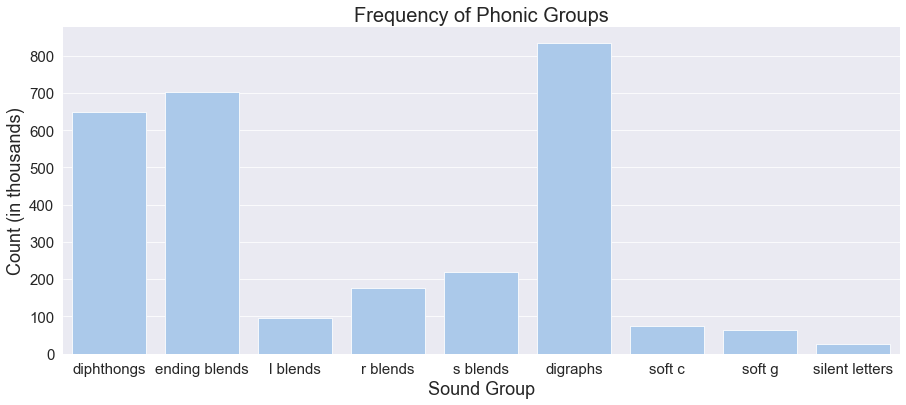

In [71]:
keys = list(count_group.keys())
counts = [int(count_group[k] / 1000) for k in keys]

sns.set_context('paper')

f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(x = keys , y = counts,
            label = '', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
ax.set_xlabel('Sound Group',fontsize=18)
ax.set_ylabel('Count (in thousands)',fontsize=18)
ax.set_yticklabels(ax.get_yticks(), size = 15)
ax.set_yticklabels(ax.get_yticks().astype(int))
ax.set_xticklabels(count_group.keys(), size = 15)
ax.set_title('Frequency of Phonic Groups', fontsize=20)
sns.despine(left = True, bottom = True)
plt.savefig('Count_Groups.jpg')
plt.show()